In [43]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [44]:
keras.backend.clear_session()

In [45]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.mnist.load_data()

In [46]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [72]:
x_train.shape

(60000, 28, 28)

In [73]:
y_train.shape

(60000,)

In [47]:
X_train_flattened = x_train.reshape(len(x_train), 28*28)
X_test_flattened = x_test.reshape(len(x_test), 28*28)

In [48]:
y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)

In [49]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation="relu"), keras.layers.Dense(10, activation="softmax")])

c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
history = model.fit(X_train_flattened, y_train_cat, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9414 - loss: 0.2101
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9416 - loss: 0.2088
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9417 - loss: 0.2060
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9415 - loss: 0.2034
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9425 - loss: 0.2008
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9463 - loss: 0.1960
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9441 - loss: 0.1938
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9438 - loss: 0.1955
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9452 - loss: 0.1926
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9468 - loss: 0.1879


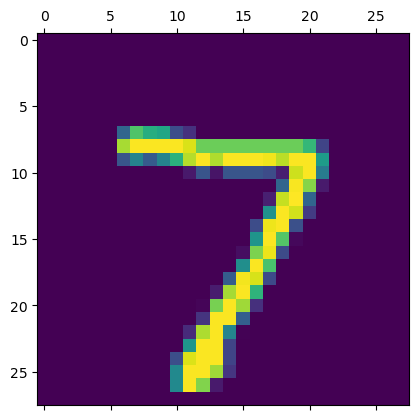

In [65]:
plt.matshow(x_test[0])

In [67]:
predictions = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step


In [69]:
predicted_label = np.argmax(predictions, axis=1)
predicted_label[0]

7

In [70]:
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test_cat)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9287 - loss: 0.2565
Test Accuracy: 93.67%


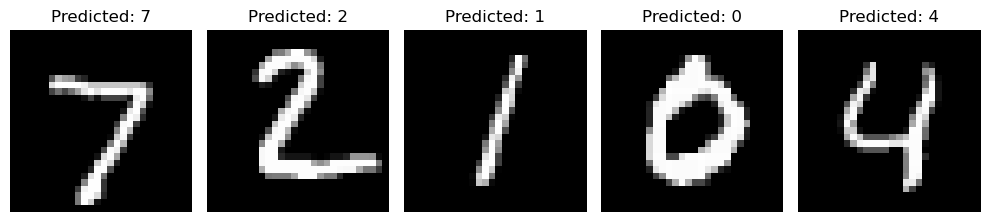

In [71]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    img = x_test[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {predicted_label[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()